# Python-MLearning: Portuguese Banking Data using Logistic Regression (LR) and PCA Reduced Dimension
## EXPLORING DATASET AND FEATURE ENGINEERING

By: Hector Alvaro Rojas &nbsp;&nbsp;|&nbsp;&nbsp; Data Science, Visualizations and Applied Statistics &nbsp;&nbsp;|&nbsp;&nbsp; August 15, 2018<br>
    Url: [http://www.arqmain.net]   &nbsp;&nbsp;&nbsp;|&nbsp;&nbsp;&nbsp;   GitHub: [https://github.com/arqmain]
    <hr>

# I IMPORT REQUIRED PACKAGES

In [2]:
import os
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)


# II LOADING DATA

In [3]:
#Checking working directory
# import os
os.getcwd()

'C:\\Users\\Alvaro\\Documents\\R-Python-Projects_April042018\\Python_Projects\\Machine-Learning\\LogisticRegression\\Logistic1'

In [4]:
#List files in a directory
os.listdir()

['.ipynb_checkpoints',
 'Backup',
 'bankmarket.csv',
 'bankmarket_final.csv',
 'Link to here.txt',
 'Links to LR1 GITHUBE and Nbviewer.txt',
 'Nueva carpeta',
 'PYTHON-MLearning_LR1_Exploratory_FEngineering.ipynb',
 'PYTHON-MLearning_LR1_Introduction.ipynb',
 'PYTHON-MLearning_LR1_Modeling.ipynb',
 'To Put in the GitHube Menu.txt']

In [47]:
# read csv (comma separated value) into data
data=pd.read_csv('bankmarket.csv')
print(data.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')


# How About Data Checking?

In [6]:
data.head()

# print head and tail rows from dataset 
print("* data.head()", data.head(), sep="\n", end="\n\n")
print("* data.tail()", data.tail(), sep="\n", end="\n\n")

* data.head()
   age          job  marital          education  default housing loan  \
0   44  blue-collar  married           basic.4y  unknown     yes   no   
1   53   technician  married            unknown       no      no   no   
2   28   management   single  university.degree       no     yes   no   
3   39     services  married        high.school       no      no   no   
4   55      retired  married           basic.4y       no     yes   no   

    contact month day_of_week ...  campaign  pdays  previous     poutcome  \
0  cellular   aug         thu ...         1    999         0  nonexistent   
1  cellular   nov         fri ...         1    999         0  nonexistent   
2  cellular   jun         thu ...         3      6         2      success   
3  cellular   apr         fri ...         2    999         0  nonexistent   
4  cellular   aug         fri ...         1      3         1      success   

  emp_var_rate  cons_price_idx  cons_conf_idx  euribor3m  nr_employed  y  
0        

The data seems to be in a usable format.

The first row in the data file defines the column headers, and the headers are descriptive enough for us to understand what each column represents.

Each row following the first one represents an entry for a client.

In [48]:
# shape
print(data.shape)

(41188, 21)


This is exactly the result we are looking for. We should see 41188 instances (rows) and 21 attributes (columns) as an answer.

# How about missing values?

One of the first things we should look for is missing data. We will assume that 'NA' is the code into the dataset to represent a missing measurement. 

We can tell pandas to automatically identify missing values if it knows our missing value marker.

In [49]:
# tell pandas that 'NA' means missing value
#data = pd.read_csv('bankmarket.csv', na_values=['NA'], index_col=0)
data = pd.read_csv('bankmarket.csv', na_values=['NA'])
data.shape

(41188, 21)

Now pandas knows to treat rows with 'NA' as missing values. Let's take a look if we have rows with missing values:

In [50]:
#  tell pandas to look for rows with missing values
data[(data['age'].isnull()) |
              (data['job'].isnull()) |
              (data['marital'].isnull()) |
              (data['education'].isnull()) |
              (data['default'].isnull()) |
              (data['housing'].isnull()) |
              (data['loan'].isnull()) |
              (data['contact'].isnull()) |
              (data['month'].isnull()) |
              (data['day_of_week'].isnull()) |
              (data['duration'].isnull()) |
              (data['campaign'].isnull()) |
              (data['pdays'].isnull()) |
              (data['previous'].isnull()) |
              (data['poutcome'].isnull()) |
              (data['emp_var_rate'].isnull()) |
              (data['cons_price_idx'].isnull()) |
              (data['cons_conf_idx'].isnull()) |
              (data['euribor3m'].isnull()) |
              (data['nr_employed'].isnull()) |
              (data['y'].isnull())]


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y


This is exactly the result we are looking for. If the dataset has no missing value in it, we should get only the names of the variables as the output for the script above, nothing more. 

In [51]:
# count the number of non-NA values in the dataset
print(data.count())

age               41188
job               41188
marital           41188
education         41188
default           41188
housing           41188
loan              41188
contact           41188
month             41188
day_of_week       41188
duration          41188
campaign          41188
pdays             41188
previous          41188
poutcome          41188
emp_var_rate      41188
cons_price_idx    41188
cons_conf_idx     41188
euribor3m         41188
nr_employed       41188
y                 41188
dtype: int64


In [ ]:
This is just a re-check of what we already know. This is exactly the result we are looking for.

In [52]:
# get some information about the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp_var_rate      41188 non-null float64
cons_price_idx    41188 non-null float64
cons_conf_idx     41188 non-null float64
euribor3m         41188 non-null float64
nr_employed       41188 non-null float64
y                 41188 non-null int64
dtypes: float64(5), int64(6), object(10)
memory usag

# How about some data exploration?

## About output variable Y

In [53]:
data['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

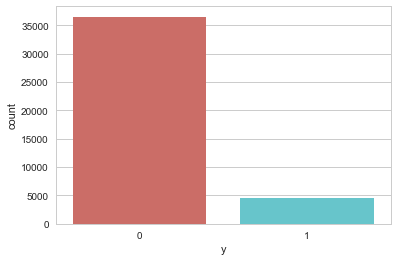

In [54]:
sns.countplot(x='y',data=data, palette='hls')
plt.show()
plt.savefig('count_plot')

There are 36548 no's and 4640 yes's in the outcome variables.  So, we are dealing with an unbalanced dataset.

## About average by groupping variables

In [55]:
#Y and the rest:
var_list = ['age','duration','campaign','pdays','previous', 'emp_var_rate',	'cons_price_idx','cons_conf_idx','euribor3m', 'nr_employed']
compara = data.pivot_table(index=['y'], values=var_list, aggfunc='mean')
round(compara,4)

,age,campaign,cons_conf_idx,cons_price_idx,duration,emp_var_rate,euribor3m,nr_employed,pdays,previous
y,,,,,,,,,,
0,39.9112,2.6331,-40.5931,93.6038,220.8448,0.2489,3.8115,5176.1666,984.1139,0.1324
1,40.9131,2.0517,-39.7898,93.3544,553.1912,-1.2334,2.1231,5095.1160,792.0356,0.4927


In [56]:
#Job and the rest:
var_list = ['age','duration','campaign','pdays','previous', 'emp_var_rate',	'cons_price_idx','cons_conf_idx','euribor3m', 'nr_employed']
compara = data.pivot_table(index=['job'], values=var_list, aggfunc='mean')
round(compara,4)

,age,campaign,cons_conf_idx,cons_price_idx,duration,emp_var_rate,euribor3m,nr_employed,pdays,previous
job,,,,,,,,,,
admin.,38.1873,2.6235,-40.2454,93.5341,254.3121,0.0156,3.5503,5164.1254,954.3192,0.1890
blue-collar,39.5558,2.5585,-41.3758,93.6567,264.5424,0.2490,3.7720,5175.6152,985.1604,0.1225
entrepreneur,41.7232,2.5357,-41.2837,93.6054,263.2679,0.1587,3.7911,5176.3135,981.2672,0.1387
housemaid,45.5000,2.6396,-39.4953,93.6766,250.4547,0.4334,4.0096,5179.5296,960.5792,0.1377
management,42.3629,2.4761,-40.4895,93.5228,257.0581,-0.0127,3.6113,5166.6505,962.6471,0.1850
retired,62.0273,2.4767,-38.5731,93.4308,273.7122,-0.6983,2.7701,5122.2622,897.9360,0.3273
self-employed,39.9493,2.6608,-40.4881,93.5600,264.1422,0.0942,3.6894,5170.6744,976.6214,0.1436
services,37.9264,2.5878,-41.2900,93.6347,258.3981,0.1754,3.6992,5171.6001,979.9740,0.1550
student,25.8949,2.1040,-40.1875,93.3316,283.6834,-1.4080,1.8842,5085.9391,840.2171,0.5246


In [57]:
#Job, Y and the rest:
var_list = ['age','duration','campaign','pdays','previous', 'emp_var_rate',	'cons_price_idx','cons_conf_idx','euribor3m', 'nr_employed']
compara = data.pivot_table(index=['job','y'], values=var_list, aggfunc='mean')
round(compara,4)

age  campaign  cons_conf_idx  cons_price_idx  duration  \
job           y                                                               
admin.        0  38.2198    2.7077       -40.3498         93.5660  215.0934   
              1  37.9689    2.0584       -39.5455         93.3195  517.4142   
blue-collar   0  39.5821    2.5882       -41.3466         93.6689  229.8780   
              1  39.2006    2.1567       -41.7708         93.4915  732.6740   
entrepreneur  0  41.7035    2.5796       -41.3198         93.6262  225.6329   
              1  41.9355    2.0645       -40.8952         93.3812  667.5403   
housemaid     0  44.7055    2.7222       -39.6268         93.7128  218.7788   
              1  52.6509    1.8962       -38.3113         93.3509  535.5377   
management    0  42.3097    2.5324       -40.6200         93.5501  220.8282   
              1  42.7835    2.0305       -39.4564         93.3066  543.8049   
retired       0  59.9261    2.6571       -38.9208         93.4933  224.2636   
              1  68.2535    1.9424       -37.5429         93.2456  420.2350   
self-employed 0  40.1769    2.7248       -40.5010         93.5918  222.2209   
              1  38.0067    2.1141       -40.3779         93.2885  622.0201   
services      0  38.0902    2.6193       -41.3275         93.6504  225.0480   
              1  36.0774    2.2322       -40.8669         93.4566  634.8514   
student       0  26.3967    2.2383       -40.7515         93.3508  228.8517   
              1  24.8000    1.8109       -38.9571         93.2898  403.3164   
technician    0  38.6000    2.6418       -39.9183         93.5842  213.4520   
              1  37.7466    2.0466       -40.0038         93.3743  553.1904   
unemployed    0  39.8448    2.6690       -40.1939         93.6044  212.7069   
              1  39.0625    1.9306       -38.8819         93.3186  471.4514   
unknown       0  45.3754    2.6792       -38.8826         93.7487  204.5597   
              1  47.0541    2.4054       -38.1270         93.4833  517.7568   

                 emp_var_rate  euribor3m  nr_employed     pdays  previous  
job           y                                                            
admin.        0        0.2241     3.7866    5175.5121  981.2708    0.1411  
              1       -1.3832     1.9651    5087.7368  773.5126    0.5104  
blue-collar   0        0.3036     3.8354    5178.2960  991.5164    0.1117  
              1       -0.4878     2.9157    5139.4107  899.3245    0.2696  
entrepreneur  0        0.2429     3.8816    5180.2056  987.8138    0.1284  
              1       -0.7452     2.8188    5134.5048  910.9435    0.2500  
housemaid     0        0.6413     4.2431    5190.5532  986.4916    0.0891  
              1       -1.4377     1.9087    5080.3170  727.3679    0.5755  
management    0        0.1412     3.7855    5175.0374  984.8486    0.1410  
              1       -1.2308     2.2329    5100.2710  786.9299    0.5335  
retired       0       -0.2839     3.2498    5146.0433  960.3694    0.2123  
              1       -1.9263     1.3486    5051.7954  712.9378    0.6682  
self-employed 0        0.2426     3.8542    5177.9580  988.0731    0.1234  
              1       -1.1732     2.2822    5108.4946  878.8591    0.3154  
services      0        0.2567     3.7938    5176.0381  991.0916    0.1363  
              1       -0.7430     2.6311    5121.5050  854.4799    0.3653  
student       0       -1.1332     2.2087    5104.5075  924.5967    0.3950  
              1       -2.0076     1.1763    5045.4262  656.1164    0.8073  
technician    0        0.4417     4.0123    5184.9517  985.1355    0.1111  
              1       -1.1021     2.2396    5099.0171  793.6767    0.5055  
unemployed    0        0.1472     3.7755    5172.2452  973.8793    0.1310  
              1       -1.6764     1.6004    5065.9958  702.3333    0.6111  
unknown       0        0.5553     4.1540    5182.7427  954.8737    0.0956  
              1       -1.2054     2.3256    5095.2405  810.8649   

From the tables above we can observe that the average age of customers who bought the term deposit is almost the same than that of the customers who didn't. The pdays (days since the customer was last contacted) is understandably lower for the customers who bought it. At the same time, campaigns (number of contacts or calls made during the current campaign) are lower for customers who bought the term deposit.

Nowthen, we proceed calculating means for other categorical variables such as education and marital status just to get a more detailed sense of our data.

In [58]:
#Marital and the rest:
var_list = ['age','duration','campaign','pdays','previous', 'emp_var_rate',	'cons_price_idx','cons_conf_idx','euribor3m', 'nr_employed']
compara = data.pivot_table(index=['marital'], values=var_list, aggfunc='mean')
round(compara,4)

,age,campaign,cons_conf_idx,cons_price_idx,duration,emp_var_rate,euribor3m,nr_employed,pdays,previous
marital,,,,,,,,,,
divorced,44.8994,2.6134,-40.7071,93.6066,253.7903,0.1640,3.7156,5170.8786,968.6399,0.1687
married,42.3072,2.5728,-40.2707,93.5974,257.4386,0.1836,3.7458,5171.8488,967.2477,0.1556
single,33.1587,2.5338,-40.9187,93.5173,261.5244,-0.1680,3.3174,5155.1993,949.9096,0.2114
unknown,40.2750,3.1875,-40.8200,93.4712,312.7250,-0.2213,3.3130,5157.3937,937.1000,0.2750


In [59]:
#Education and the rest:
var_list = ['age','duration','campaign','pdays','previous', 'emp_var_rate',	'cons_price_idx','cons_conf_idx','euribor3m', 'nr_employed']
compara = data.pivot_table(index=['education'], values=var_list, aggfunc='mean')
round(compara,4)

,age,campaign,cons_conf_idx,cons_price_idx,duration,emp_var_rate,euribor3m,nr_employed,pdays,previous
education,,,,,,,,,,
basic.4y,47.5965,2.6006,-40.2399,93.6583,264.8278,0.2159,3.7518,5170.1249,965.7050,0.1470
basic.6y,40.4490,2.5563,-41.1279,93.6501,264.4145,0.2312,3.7729,5174.7181,980.3682,0.1291
basic.9y,39.0612,2.5323,-41.3267,93.6234,261.2918,0.1592,3.6980,5172.2940,979.1332,0.1414
high.school,37.9982,2.5686,-40.9406,93.5849,260.8868,0.0329,3.5562,5164.9947,964.3584,0.1859
illiterate,48.5000,2.2778,-39.9500,93.3173,276.7778,-0.1333,3.5166,5171.7778,943.8333,0.1111
professional.course,40.0801,2.5861,-40.1241,93.5699,252.5339,0.1730,3.7105,5170.1560,960.7660,0.1631
university.degree,38.8792,2.5635,-39.9758,93.4935,253.2234,-0.0281,3.5297,5163.2263,951.8077,0.1924
unknown,43.4812,2.5962,-39.8778,93.6586,262.3905,0.0591,3.5711,5159.5495,942.8307,0.2265


## Data Checking

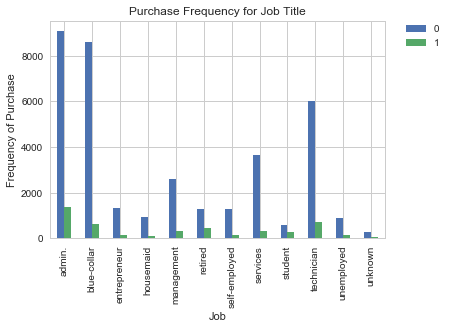

In [64]:
%matplotlib inline
pd.crosstab(data.job,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')
plt.savefig('purchase_fre_job')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [17]:
pd.crosstab(data.job,data.y)

y,0,1
job,,
admin.,9070,1352
blue-collar,8616,638
entrepreneur,1332,124
housemaid,954,106
management,2596,328
retired,1286,434
self-employed,1272,149
services,3646,323
student,600,275


In [18]:
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(pd.crosstab(data.job,data.y))
#chi2, p

print('Chi-Squared Test of Independence: Ho:X e Y Independent v/s H1:X e Y  Not Independent')
print("Decision Rule: If p_value ≤ α ⇒ Reject Ho assuming a risk α")
print("")
print("Results: Chi2 value is: %2.5f" % chi2, " p_value full is: ", p, " p_value rounded : %2.5f" % p)


Chi-Squared Test of Independence: Ho:X e Y Independent v/s H1:X e Y  Not Independent
Decision Rule: If p_value ≤ α ⇒ Reject Ho assuming a risk α

Results: Chi2 value is: 961.24244  p_value full is:  4.189763287563623e-199  p_value rounded : 0.00000


The frequency of purchase of the deposit depends on the job title. Thus, the "job title" can be a good predictor of the outcome variable (Y).

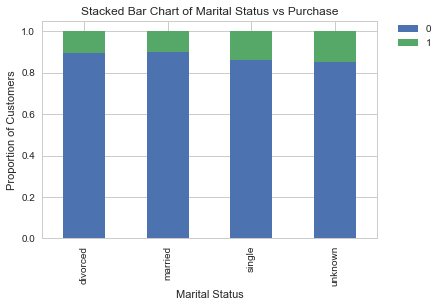

In [65]:
table=pd.crosstab(data.marital,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Marital Status vs Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')
plt.savefig('mariral_vs_pur_stack')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [20]:
pd.crosstab(data.marital,data.y)

y,0,1
marital,,
divorced,4136,476
married,22396,2532
single,9948,1620
unknown,68,12


In [21]:
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(pd.crosstab(data.marital,data.y))
#chi2, p

print('Chi-Squared Test of Independence: Ho:X e Y Independent v/s H1:X e Y  Not Independent')
print("Decision Rule: If p_value ≤ α ⇒ Reject Ho assuming a risk α")
print("")
print("Results: Chi2 value is: %2.5f" % chi2, " p_value full is: ", p, " p_value rounded : %2.5f" % p)


Chi-Squared Test of Independence: Ho:X e Y Independent v/s H1:X e Y  Not Independent
Decision Rule: If p_value ≤ α ⇒ Reject Ho assuming a risk α

Results: Chi2 value is: 122.65515  p_value full is:  2.068014648442211e-26  p_value rounded : 0.00000


Marital status seems to be a good predictor of the outcome variable (y).

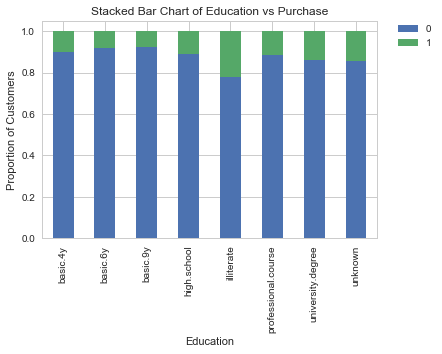

In [66]:
table=pd.crosstab(data.education,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Education vs Purchase')
plt.xlabel('Education')
plt.ylabel('Proportion of Customers')
plt.savefig('edu_vs_pur_stack')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [23]:
pd.crosstab(data.education,data.y)

y,0,1
education,,
basic.4y,3748,428
basic.6y,2104,188
basic.9y,5572,473
high.school,8484,1031
illiterate,14,4
professional.course,4648,595
university.degree,10498,1670
unknown,1480,251


In [24]:
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(pd.crosstab(data.education,data.y))
#chi2, p

print('Chi-Squared Test of Independence: Ho:X e Y Independent v/s H1:X e Y  Not Independent')
print("Decision Rule: If p_value ≤ α ⇒ Reject Ho assuming a risk α")
print("")
print("Results: Chi2 value is: %2.5f" % chi2, " p_value full is: ", p, " p_value rounded : %2.5f" % p)


Chi-Squared Test of Independence: Ho:X e Y Independent v/s H1:X e Y  Not Independent
Decision Rule: If p_value ≤ α ⇒ Reject Ho assuming a risk α

Results: Chi2 value is: 193.10590  p_value full is:  3.3051890144025054e-38  p_value rounded : 0.00000


Education seems to be a good predictor of the outcome variable (y).

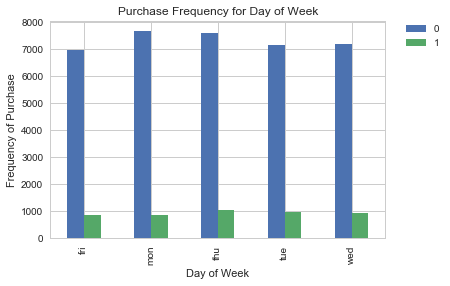

In [67]:
pd.crosstab(data.day_of_week,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_dayofweek_bar')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [26]:
pd.crosstab(data.day_of_week,data.y)

y,0,1
day_of_week,,
fri,6981,846
mon,7667,847
thu,7578,1045
tue,7137,953
wed,7185,949


In [27]:
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(pd.crosstab(data.day_of_week,data.y))
#chi2, p

print('Chi-Squared Test of Independence: Ho:X e Y Independent v/s H1:X e Y  Not Independent')
print("Decision Rule: If p_value ≤ α ⇒ Reject Ho assuming a risk α")
print("")
print("Results: Chi2 value is: %2.5f" % chi2, " p_value full is: ", p, " p_value rounded : %2.5f" % p)


Chi-Squared Test of Independence: Ho:X e Y Independent v/s H1:X e Y  Not Independent
Decision Rule: If p_value ≤ α ⇒ Reject Ho assuming a risk α

Results: Chi2 value is: 26.14494  p_value full is:  2.9584820052785324e-05  p_value rounded : 0.00003


Day of week seems to be a good predictor of the outcome variable (y).

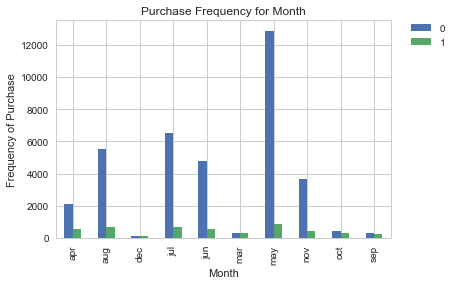

In [68]:
pd.crosstab(data.month,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Month')
plt.xlabel('Month')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_fre_month_bar')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [29]:
pd.crosstab(data.month,data.y)

y,0,1
month,,
apr,2093,539
aug,5523,655
dec,93,89
jul,6525,649
jun,4759,559
mar,270,276
may,12883,886
nov,3685,416
oct,403,315


In [30]:
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(pd.crosstab(data.month,data.y))
#chi2, p

print('Chi-Squared Test of Independence: Ho:X e Y Independent v/s H1:X e Y  Not Independent')
print("Decision Rule: If p_value ≤ α ⇒ Reject Ho assuming a risk α")
print("")
print("Results: Chi2 value is: %2.5f" % chi2, " p_value full is: ", p, " p_value rounded : %2.5f" % p)


Chi-Squared Test of Independence: Ho:X e Y Independent v/s H1:X e Y  Not Independent
Decision Rule: If p_value ≤ α ⇒ Reject Ho assuming a risk α

Results: Chi2 value is: 3101.14935  p_value full is:  0.0  p_value rounded : 0.00000



Month might be a good predictor of the outcome variable (y)

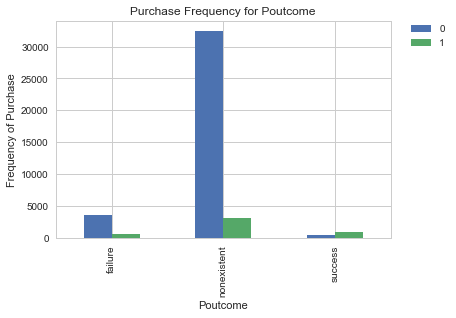

In [69]:
pd.crosstab(data.poutcome,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Poutcome')
plt.xlabel('Poutcome')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_fre_pout_bar')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [32]:
pd.crosstab(data.poutcome,data.y)

y,0,1
poutcome,,
failure,3647,605
nonexistent,32422,3141
success,479,894


In [33]:
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(pd.crosstab(data.poutcome,data.y))
#chi2, p

print('Chi-Squared Test of Independence: Ho:X e Y Independent v/s H1:X e Y  Not Independent')
print("Decision Rule: If p_value ≤ α ⇒ Reject Ho assuming a risk α")
print("")
print("Results: Chi2 value is: %2.5f" % chi2, " p_value full is: ", p, " p_value rounded : %2.5f" % p)


Chi-Squared Test of Independence: Ho:X e Y Independent v/s H1:X e Y  Not Independent
Decision Rule: If p_value ≤ α ⇒ Reject Ho assuming a risk α

Results: Chi2 value is: 4230.52380  p_value full is:  0.0  p_value rounded : 0.00000


Poutcome seems to be a good predictor of the outcome variable (y).

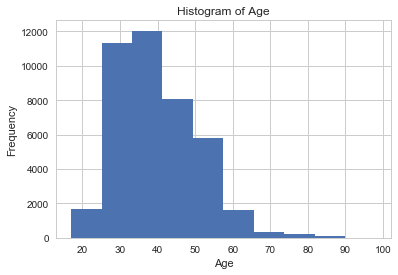

In [34]:
data.age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('hist_age')

# How about some Feature Engineering?

## Start all data again

In [39]:
# read csv (comma separated value) into data
data=pd.read_csv('bankmarket.csv')
print(data.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')


## Replace Feature Values

In [40]:
#Replace 999 in pdays with zeros
data.loc[:, 'pdays'].replace([999], [0], inplace=True)
# get some information about the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp_var_rate      41188 non-null float64
cons_price_idx    41188 non-null float64
cons_conf_idx     41188 non-null float64
euribor3m         41188 non-null float64
nr_employed       41188 non-null float64
y                 41188 non-null int64
dtypes: float64(5), int64(6), object(10)
memory usag

## Feature Re-coding

In [14]:
data['education'].unique()

array(['basic.4y', 'unknown', 'university.degree', 'high.school',
       'basic.9y', 'professional.course', 'basic.6y', 'illiterate'],
      dtype=object)

We reformulate this variable by grouping the categories "basic.4y", "basic.9y" and "basic.6y" in another call "basic".

In [41]:
data['education']=np.where(data['education'] =='basic.9y', 'Basic', data['education'])
data['education']=np.where(data['education'] =='basic.6y', 'Basic', data['education'])
data['education']=np.where(data['education'] =='basic.4y', 'Basic', data['education'])

In [ ]:
After grouping, this are the new categories of the variable.

In [42]:
data['education'].unique()

array(['Basic', 'unknown', 'university.degree', 'high.school',
       'professional.course', 'illiterate'], dtype=object)

## Creating dummy variables

In [43]:
cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data[var], prefix=var)
    data1=data.join(cat_list)
    data=data1

In [44]:
cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [45]:
data_final=data[to_keep]
data_final.columns.values

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_Basic', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',

# How about Exporting Final Dataset?

In [46]:
df = pd.DataFrame(data_final)
df.to_csv("bankmarket_final.csv",index=None, sep=',')

<hr>
By: Hector Alvaro Rojas &nbsp;&nbsp;|&nbsp;&nbsp; Data Science, Visualizations and Applied Statistics &nbsp;&nbsp;|&nbsp;&nbsp; August 15, 2018<br>
    Url: [http://www.arqmain.net]   &nbsp;&nbsp;&nbsp;|&nbsp;&nbsp;&nbsp;   GitHub: [https://github.com/arqmain]
    <hr>